In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
import math
import datetime

In [77]:
# 再現性のためランダムシード固定
np.random.seed(seed=0)
tensorflow.random.set_seed(seed=0)

In [78]:
base_dir = "./yokohama/"

temperature_csv = "data_temperature.csv"
daylight_csv = "data_daylight.csv"
wind_csv = "data_wind.csv"
rain_csv = "data_rain.csv"
vaporpressure_csv = "data_vaporpressure.csv"
cloud_csv = "data_cloud.csv"
average_atmosphere_pressure_csv = "data_average_atmosphere_pressure.csv"
max_temperature_csv = "data_max_temperature.csv"
max_wind_csv = "data_max_wind.csv"
max_instantaneous_wind_csv = "data_max_instantaneous_wind.csv"
min_humidity_csv = "data_min_humidity.csv"
min_sea_level_pressure_csv = "data_min_sea_level_pressure.csv"
min_temperature_csv = "data_min_temperature.csv"
sea_level_pressure_csv = "data_sea_level_pressure.csv"
snow_csv = "data_snow.csv"

df_temperature = pd.read_csv(os.path.join(base_dir, temperature_csv), encoding="shift-jis", header=2)
df_daylight = pd.read_csv(os.path.join(base_dir, daylight_csv), encoding="shift-jis", header=2)
df_wind = pd.read_csv(os.path.join(base_dir, wind_csv), encoding="shift-jis", header=2)
df_rain = pd.read_csv(os.path.join(base_dir, rain_csv), encoding="shift-jis", header=2)
df_vaporpressure = pd.read_csv(os.path.join(base_dir, vaporpressure_csv), encoding="shift-jis", header=2)
df_cloud = pd.read_csv(os.path.join(base_dir, cloud_csv), encoding="shift-jis", header=2)
df_average_atmosphere_pressure = pd.read_csv(os.path.join(base_dir, average_atmosphere_pressure_csv), encoding="shift-jis", header=2)
df_max_temperature = pd.read_csv(os.path.join(base_dir, max_temperature_csv), encoding="shift-jis", header=2)
df_max_wind = pd.read_csv(os.path.join(base_dir, max_wind_csv), encoding="shift-jis", header=2)
df_max_instantaneous_wind = pd.read_csv(os.path.join(base_dir, max_instantaneous_wind_csv), encoding="shift-jis", header=2)
df_min_humidity = pd.read_csv(os.path.join(base_dir, min_humidity_csv), encoding="shift-jis", header=2)
df_min_sea_level_pressure = pd.read_csv(os.path.join(base_dir, min_sea_level_pressure_csv), encoding="shift-jis", header=2)
df_min_temperature = pd.read_csv(os.path.join(base_dir, min_temperature_csv), encoding="shift-jis", header=2)
df_sea_level_pressure = pd.read_csv(os.path.join(base_dir, sea_level_pressure_csv), encoding="shift-jis", header=2)
df_snow = pd.read_csv(os.path.join(base_dir, snow_csv), encoding="shift-jis", header=2)



In [79]:
df_temperature.head(10)

,年月日,平均気温(℃),平均気温(℃).1,平均気温(℃).2
0,NaN,NaN,品質情報,均質番号
1,1992/6/18,17.4,8,1
2,1992/6/19,18.8,8,1
3,1992/6/20,17.7,8,1
4,1992/6/21,18.1,8,1
5,1992/6/22,19.0,8,1
6,1992/6/23,16.1,8,1
7,1992/6/24,16.7,8,1
8,1992/6/25,18.1,8,1
9,1992/6/26,20.6,8,1


In [80]:
df_daylight.head(10)

,年月日,日照時間(時間),日照時間(時間).1,日照時間(時間).2,日照時間(時間).3
0,NaN,NaN,現象なし情報,品質情報,均質番号
1,1992/6/18,0.0,1,8,1
2,1992/6/19,0.1,0,8,1
3,1992/6/20,0.0,1,8,1
4,1992/6/21,1.6,0,8,1
5,1992/6/22,8.9,0,8,1
6,1992/6/23,0.0,1,8,1
7,1992/6/24,0.0,1,8,1
8,1992/6/25,4.5,0,8,1
9,1992/6/26,7.9,0,8,1


In [81]:
df_wind.head(10)

,年月日,平均風速(m/s),平均風速(m/s).1,平均風速(m/s).2
0,NaN,NaN,品質情報,均質番号
1,1992/6/18,4.0,8,1
2,1992/6/19,2.1,8,1
3,1992/6/20,3.4,8,1
4,1992/6/21,3.0,8,1
5,1992/6/22,3.0,8,1
6,1992/6/23,2.8,8,1
7,1992/6/24,5.8,8,1
8,1992/6/25,2.5,8,1
9,1992/6/26,2.5,8,1


In [82]:
df_rain.head(10)

,年月日,降水量の合計(mm),降水量の合計(mm).1,降水量の合計(mm).2,降水量の合計(mm).3
0,NaN,NaN,現象なし情報,品質情報,均質番号
1,1992/6/18,13.5,0,8,1
2,1992/6/19,4.5,0,8,1
3,1992/6/20,32.5,0,8,1
4,1992/6/21,6.0,0,8,1
5,1992/6/22,0.0,0,8,1
6,1992/6/23,75.0,0,8,1
7,1992/6/24,49.0,0,8,1
8,1992/6/25,0.0,0,8,1
9,1992/6/26,0.0,1,8,1


In [83]:
df_vaporpressure.head(10)

,年月日,平均蒸気圧(hPa),平均蒸気圧(hPa).1,平均蒸気圧(hPa).2
0,NaN,NaN,品質情報,均質番号
1,1992/6/18,17.3,8,1
2,1992/6/19,17.9,8,1
3,1992/6/20,18.8,8,1
4,1992/6/21,16.8,8,1
5,1992/6/22,16.1,8,1
6,1992/6/23,16.1,8,1
7,1992/6/24,15.9,8,1
8,1992/6/25,14.4,8,1
9,1992/6/26,17.2,8,1


In [84]:
df_cloud.head(10)

,年月日,平均雲量(10分比),平均雲量(10分比).1,平均雲量(10分比).2
0,NaN,NaN,品質情報,均質番号
1,1992/6/18,10.0,8,1
2,1992/6/19,10.0,8,1
3,1992/6/20,10.0,8,1
4,1992/6/21,9.3,8,1
5,1992/6/22,7.0,8,1
6,1992/6/23,10.0,8,1
7,1992/6/24,10.0,8,1
8,1992/6/25,7.5,8,1
9,1992/6/26,7.0,8,1


In [85]:
df_average_atmosphere_pressure.head(10)


,年月日,平均現地気圧(hPa),平均現地気圧(hPa).1,平均現地気圧(hPa).2
0,NaN,NaN,品質情報,均質番号
1,1992/6/18,1004.2,8,1
2,1992/6/19,1009.2,8,1
3,1992/6/20,1007.5,8,1
4,1992/6/21,1000.6,8,1
5,1992/6/22,1003.8,8,1
6,1992/6/23,1003.9,8,1
7,1992/6/24,997.8,8,1
8,1992/6/25,1005.1,8,1
9,1992/6/26,1006.0,8,1


In [86]:
df_max_temperature.head(10)


,年月日,最高気温(℃),最高気温(℃).1,最高気温(℃).2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,品質情報,均質番号
2,1992/6/18,19.8,8,1
3,1992/6/19,21.5,8,1
4,1992/6/20,19.4,8,1
5,1992/6/21,21.1,8,1
6,1992/6/22,23.6,8,1
7,1992/6/23,17.3,8,1
8,1992/6/24,19.3,8,1
9,1992/6/25,21.9,8,1


In [87]:
df_max_wind.head(10)


,年月日,最大風速(m/s),最大風速(m/s).1,最大風速(m/s).2,最大風速(m/s).3,最大風速(m/s).4
0,NaN,NaN,NaN,風向,風向,NaN
1,NaN,NaN,品質情報,NaN,品質情報,均質番号
2,1992/6/18,7.1,8,北,8,1
3,1992/6/19,3.5,8,東,8,1
4,1992/6/20,7.4,8,北,8,1
5,1992/6/21,8.3,8,北,8,1
6,1992/6/22,4.9,8,南東,8,1
7,1992/6/23,4.8,8,北北東,8,1
8,1992/6/24,11.5,8,北,8,1
9,1992/6/25,5.3,8,南南東,8,1


In [88]:
df_max_instantaneous_wind.head(10)


,年月日,最大瞬間風速(m/s),最大瞬間風速(m/s).1,最大瞬間風速(m/s).2,最大瞬間風速(m/s).3,最大瞬間風速(m/s).4
0,NaN,NaN,NaN,風向,風向,NaN
1,NaN,NaN,品質情報,NaN,品質情報,均質番号
2,1992/6/18,11.6,8,北,8,1
3,1992/6/19,6.0,8,東,8,1
4,1992/6/20,11.2,8,北,8,1
5,1992/6/21,13.4,8,北,8,1
6,1992/6/22,9.6,8,東南東,8,1
7,1992/6/23,9.5,8,北北東,8,1
8,1992/6/24,20.5,8,北,8,1
9,1992/6/25,8.3,8,南南東,8,1


In [89]:
df_min_humidity.head(10)


,年月日,最小相対湿度(％),最小相対湿度(％).1,最小相対湿度(％).2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,品質情報,均質番号
2,1992/6/18,77.0,8,1
3,1992/6/19,71.0,8,1
4,1992/6/20,87.0,8,1
5,1992/6/21,66.0,8,1
6,1992/6/22,60.0,8,1
7,1992/6/23,72.0,8,1
8,1992/6/24,64.0,8,1
9,1992/6/25,45.0,8,1


In [90]:
df_min_sea_level_pressure.head(10)


,年月日,最低海面気圧(hPa),最低海面気圧(hPa).1,最低海面気圧(hPa).2,最低海面気圧(hPa).3
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,現象なし情報,品質情報,均質番号
2,1992/6/18,0.0,1,8,1
3,1992/6/19,0.0,1,8,1
4,1992/6/20,0.0,1,8,1
5,1992/6/21,0.0,1,8,1
6,1992/6/22,0.0,1,8,1
7,1992/6/23,0.0,1,8,1
8,1992/6/24,0.0,1,8,1
9,1992/6/25,0.0,1,8,1


In [91]:
df_min_temperature.head(10)


,年月日,最低気温(℃),最低気温(℃).1,最低気温(℃).2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,品質情報,均質番号
2,1992/6/18,16.1,8,1
3,1992/6/19,16.2,8,1
4,1992/6/20,16.5,8,1
5,1992/6/21,15.9,8,1
6,1992/6/22,15.9,8,1
7,1992/6/23,14.7,8,1
8,1992/6/24,14.8,8,1
9,1992/6/25,14.9,8,1


In [92]:
df_sea_level_pressure.head(10)


,年月日,平均海面気圧(hPa),平均海面気圧(hPa).1,平均海面気圧(hPa).2
0,NaN,NaN,品質情報,均質番号
1,1992/6/18,1009.1,8,1
2,1992/6/19,1014.1,8,1
3,1992/6/20,1012.4,8,1
4,1992/6/21,1005.5,8,1
5,1992/6/22,1008.7,8,1
6,1992/6/23,1008.8,8,1
7,1992/6/24,1002.7,8,1
8,1992/6/25,1010.0,8,1
9,1992/6/26,1010.9,8,1


In [93]:
df_snow.head(10)


,年月日,最深積雪(cm),最深積雪(cm).1,最深積雪(cm).2,最深積雪(cm).3
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,現象なし情報,品質情報,均質番号
2,1992/6/18,0.0,1,8,1
3,1992/6/19,0.0,1,8,1
4,1992/6/20,0.0,1,8,1
5,1992/6/21,0.0,1,8,1
6,1992/6/22,0.0,1,8,1
7,1992/6/23,0.0,1,8,1
8,1992/6/24,0.0,1,8,1
9,1992/6/25,0.0,1,8,1


In [94]:
df_list = [df_temperature,
           df_daylight,
           df_wind,
           df_rain,
           df_vaporpressure,
           df_cloud,
           df_average_atmosphere_pressure,
           df_max_temperature,
           df_max_wind,
           df_max_instantaneous_wind,
           df_min_humidity,
           df_min_sea_level_pressure,
           df_min_temperature,
           df_sea_level_pressure,
           df_snow]

def df_extract_wind(df):
    extract_col_num = [0, 1, 3]
    return df.iloc[1:, extract_col_num]

def df_extract(df):
    return df.iloc[1:, :2]

for i in range(len(df_list)):
    if i == 8 or i == 9:
        df_list[i] = df_extract_wind(df_list[i])
    else:
        df_list[i] = df_extract(df_list[i])


In [95]:
df_list[8]

,年月日,最大風速(m/s),最大風速(m/s).2
1,NaN,NaN,NaN
2,1992/6/18,7.1,北
3,1992/6/19,3.5,東
4,1992/6/20,7.4,北
5,1992/6/21,8.3,北
...,...,...,...
10225,2020/6/14,8.9,南西
10226,2020/6/15,7.3,南西
10227,2020/6/16,7.1,南南東
10228,2020/6/17,5.4,東


In [96]:
print(df_temperature.shape)

(10229, 4)


In [97]:
# 風向きを数値化
wind_dir = {'北': 0,
            '北北東': 1,
            '北東': 2,
            '東北東': 3,
            '東': 4, 
            '東南東': 5,
            '南東': 6,
            '南南東': 7,
            '南': 8,
            '南南西': 9,
            '南西': 10,
            '西南西': 11,
            '西': 12,
            '西北西': 13,
            '北西': 14,
            '北北西':15}

for i in range(len(df_list)):
    if i == 8 or i == 9:
        df_list[i].iloc[:, 0] = df_list[i].iloc[:, 0].interpolate()
        df_list[i].iloc[:, 1] = df_list[i].iloc[:, 1].interpolate()
        df_list[i].iloc[:, 2] = df_list[i].iloc[:, 2].map(wind_dir)
        df_list[i].iloc[:, 2] = df_list[i].iloc[:, 2].fillna(method='ffill') 
    else:
        df_list[i] = df_list[i].interpolate()


In [98]:
df_list[0]

,年月日,平均気温(℃)
1,1992/6/18,17.4
2,1992/6/19,18.8
3,1992/6/20,17.7
4,1992/6/21,18.1
5,1992/6/22,19.0
...,...,...
10224,2020/6/14,22.4
10225,2020/6/15,26.5
10226,2020/6/16,25.4
10227,2020/6/17,24.1


In [99]:
for df in df_list[1:]:
    df_list[0] = pd.merge(df_list[0], df, on="年月日")


In [100]:
df_temperature = df_list[0]
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10228 entries, 0 to 10227
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   年月日            10228 non-null  object 
 1   平均気温(℃)        10228 non-null  float64
 2   日照時間(時間)       10228 non-null  float64
 3   平均風速(m/s)      10228 non-null  float64
 4   降水量の合計(mm)     10228 non-null  float64
 5   平均蒸気圧(hPa)     10228 non-null  float64
 6   平均雲量(10分比)     10228 non-null  float64
 7   平均現地気圧(hPa)    10228 non-null  float64
 8   最高気温(℃)        10228 non-null  float64
 9   最大風速(m/s)      10228 non-null  float64
 10  最大風速(m/s).2    10228 non-null  float64
 11  最大瞬間風速(m/s)    10228 non-null  float64
 12  最大瞬間風速(m/s).2  10228 non-null  float64
 13  最小相対湿度(％)      10228 non-null  float64
 14  最低海面気圧(hPa)    10228 non-null  float64
 15  最低気温(℃)        10228 non-null  float64
 16  平均海面気圧(hPa)    10228 non-null  float64
 17  最深積雪(cm)       10228 non-null  float64
dtypes: flo

In [101]:
df_temperature.index = pd.to_datetime(df_temperature['年月日'])
df_temperature.drop('年月日', axis=1, inplace=True)

In [102]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10228 entries, 1992-06-18 to 2020-06-18
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   平均気温(℃)        10228 non-null  float64
 1   日照時間(時間)       10228 non-null  float64
 2   平均風速(m/s)      10228 non-null  float64
 3   降水量の合計(mm)     10228 non-null  float64
 4   平均蒸気圧(hPa)     10228 non-null  float64
 5   平均雲量(10分比)     10228 non-null  float64
 6   平均現地気圧(hPa)    10228 non-null  float64
 7   最高気温(℃)        10228 non-null  float64
 8   最大風速(m/s)      10228 non-null  float64
 9   最大風速(m/s).2    10228 non-null  float64
 10  最大瞬間風速(m/s)    10228 non-null  float64
 11  最大瞬間風速(m/s).2  10228 non-null  float64
 12  最小相対湿度(％)      10228 non-null  float64
 13  最低海面気圧(hPa)    10228 non-null  float64
 14  最低気温(℃)        10228 non-null  float64
 15  平均海面気圧(hPa)    10228 non-null  float64
 16  最深積雪(cm)       10228 non-null  float64
dtypes: float64(17)
memory usage: 1.4 

In [103]:
df_temperature['最大風速(m/s).2'] = df_temperature['最大風速(m/s).2'].astype(np.int8)
df_temperature['最大瞬間風速(m/s).2'] = df_temperature['最大瞬間風速(m/s).2'].astype(np.int8)

df_temperature

,平均気温(℃),日照時間(時間),平均風速(m/s),降水量の合計(mm),平均蒸気圧(hPa),平均雲量(10分比),平均現地気圧(hPa),最高気温(℃),最大風速(m/s),最大風速(m/s).2,最大瞬間風速(m/s),最大瞬間風速(m/s).2,最小相対湿度(％),最低海面気圧(hPa),最低気温(℃),平均海面気圧(hPa),最深積雪(cm)
年月日,,,,,,,,,,,,,,,,,
1992-06-18,17.4,0.0,4.0,13.5,17.3,10.0,1004.2,19.8,7.1,0,11.6,0,77.0,0.0,16.1,1009.1,0.0
1992-06-19,18.8,0.1,2.1,4.5,17.9,10.0,1009.2,21.5,3.5,4,6.0,4,71.0,0.0,16.2,1014.1,0.0
1992-06-20,17.7,0.0,3.4,32.5,18.8,10.0,1007.5,19.4,7.4,0,11.2,0,87.0,0.0,16.5,1012.4,0.0
1992-06-21,18.1,1.6,3.0,6.0,16.8,9.3,1000.6,21.1,8.3,0,13.4,0,66.0,0.0,15.9,1005.5,0.0
1992-06-22,19.0,8.9,3.0,0.0,16.1,7.0,1003.8,23.6,4.9,6,9.6,5,60.0,0.0,15.9,1008.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-14,22.4,0.0,2.8,5.5,25.5,2.0,1000.3,25.6,8.9,10,16.0,9,82.0,998.2,20.4,1005.2,0.0
2020-06-15,26.5,7.4,2.8,0.0,25.2,2.0,995.5,31.9,7.3,10,12.8,9,52.0,997.4,22.1,1000.3,0.0
2020-06-16,25.4,7.2,3.8,0.0,21.2,2.0,996.0,29.7,7.1,7,11.9,0,49.0,999.1,22.9,1000.9,0.0


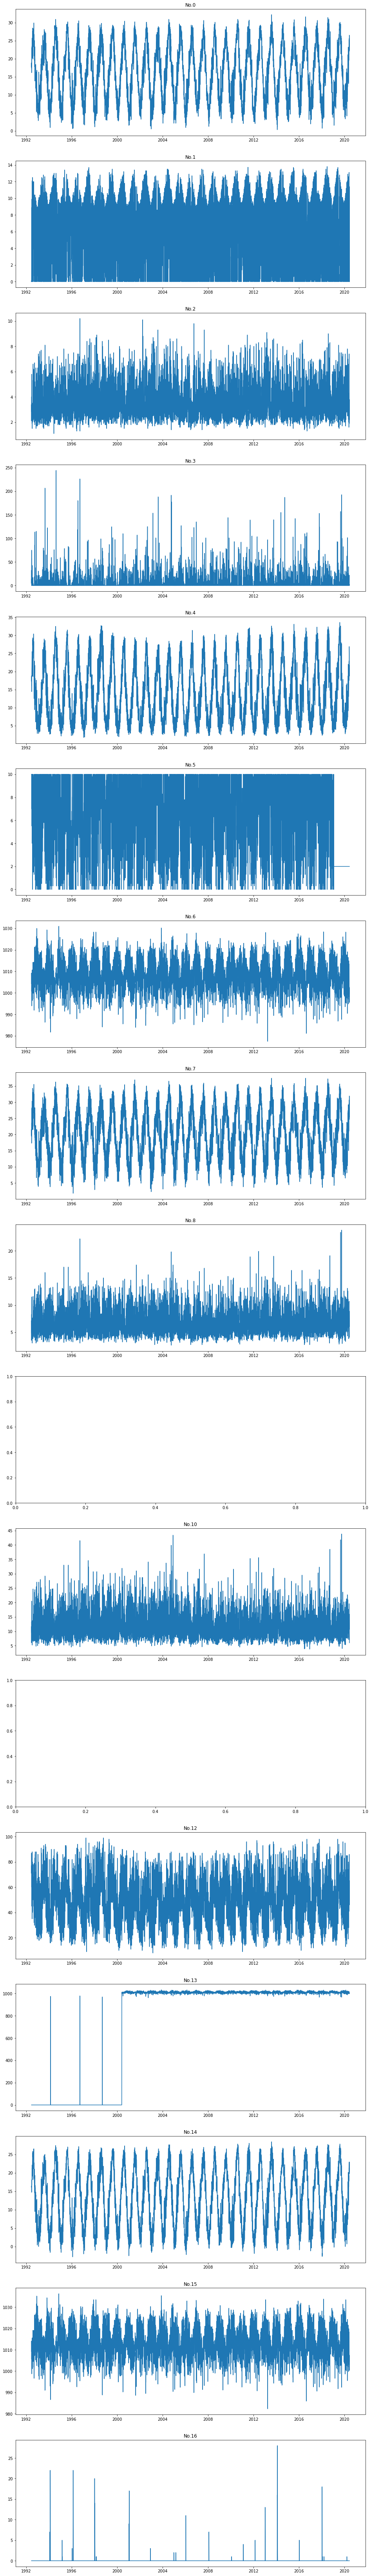

In [104]:
# グラフ化
fig, axes = plt.subplots(len(df_temperature.columns), 1, figsize=(16, 120))
axes.flatten()
for i in range(len(df_temperature.columns)):
    if i == 9 or i == 11:
        continue
    axes[i].plot(df_temperature.index, df_temperature.values[:, i])
    axes[i].set_title(f"No.{i}")
plt.show()

# 0   平均気温(℃)      10227 non-null  float64
# 1   日照時間(時間)     10227 non-null  float64
# 2   平均風速(m/s)    10227 non-null  float64
# 3   降水量の合計(mm)   10227 non-null  float64
# 4   平均蒸気圧(hPa)   10227 non-null  float64
# 5   平均雲量(10分比)   10227 non-null  float64
# 6   平均現地気圧(hPa)  10227 non-null  float64
# 7   最高気温(℃)      10227 non-null  float64
# 8   最大風速(m/s)    10227 non-null  float64
# 10   最大瞬間風速(m/s)  10227 non-null  float64
# 12  最小相対湿度(％)    10227 non-null  float64
# 13  最低海面気圧(hPa)  10227 non-null  float64
# 14  最低気温(℃)      10227 non-null  float64
# 15  平均海面気圧(hPa)  10227 non-null  float64
# 16  最深積雪(cm)     10227 non-null  float64

# 9, 11 は風向きのため表示なし

In [105]:
# グラフの挙動がおかしいため削除
df_temperature.drop("最低海面気圧(hPa)", axis=1, inplace=True)

In [106]:
df_temperature.shape

(10228, 16)

In [107]:
# 風向きを後ろに移動
column_list = ["平均気温(℃)",
               "日照時間(時間)",
               "平均風速(m/s)",
               "降水量の合計(mm)",
               "平均蒸気圧(hPa)",
               "平均雲量(10分比)",
               "平均現地気圧(hPa)",
               "最高気温(℃)",
               "最大風速(m/s)",
               "最大瞬間風速(m/s)",
               "最小相対湿度(％)",
               "最低気温(℃)",
               "平均海面気圧(hPa)",
               "最深積雪(cm)",
               "最大風速(m/s).2",
               "最大瞬間風速(m/s).2"]

df_temperature = df_temperature[column_list]
               

In [108]:
df_temperature

,平均気温(℃),日照時間(時間),平均風速(m/s),降水量の合計(mm),平均蒸気圧(hPa),平均雲量(10分比),平均現地気圧(hPa),最高気温(℃),最大風速(m/s),最大瞬間風速(m/s),最小相対湿度(％),最低気温(℃),平均海面気圧(hPa),最深積雪(cm),最大風速(m/s).2,最大瞬間風速(m/s).2
年月日,,,,,,,,,,,,,,,,
1992-06-18,17.4,0.0,4.0,13.5,17.3,10.0,1004.2,19.8,7.1,11.6,77.0,16.1,1009.1,0.0,0,0
1992-06-19,18.8,0.1,2.1,4.5,17.9,10.0,1009.2,21.5,3.5,6.0,71.0,16.2,1014.1,0.0,4,4
1992-06-20,17.7,0.0,3.4,32.5,18.8,10.0,1007.5,19.4,7.4,11.2,87.0,16.5,1012.4,0.0,0,0
1992-06-21,18.1,1.6,3.0,6.0,16.8,9.3,1000.6,21.1,8.3,13.4,66.0,15.9,1005.5,0.0,0,0
1992-06-22,19.0,8.9,3.0,0.0,16.1,7.0,1003.8,23.6,4.9,9.6,60.0,15.9,1008.7,0.0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-14,22.4,0.0,2.8,5.5,25.5,2.0,1000.3,25.6,8.9,16.0,82.0,20.4,1005.2,0.0,10,9
2020-06-15,26.5,7.4,2.8,0.0,25.2,2.0,995.5,31.9,7.3,12.8,52.0,22.1,1000.3,0.0,10,9
2020-06-16,25.4,7.2,3.8,0.0,21.2,2.0,996.0,29.7,7.1,11.9,49.0,22.9,1000.9,0.0,7,0


In [109]:
# 風向きはone_hotに変換
wind_dir_ohe = []
for i in range(2):
    wind_dir_ohe.append(to_categorical(df_temperature.values[:, 14+i]))
   
wind_dir_ohe = np.array(wind_dir_ohe)
wind_dir_ohe = np.reshape(wind_dir_ohe, (len(df_temperature), -1))

In [110]:
wind_dir_ohe.shape

(10228, 32)

In [111]:
def create_dataset(dataset, look_back):
    data_X, data_y = [], []
    for i in range(look_back, len(dataset)):
        data_X.append(dataset[i-look_back:i, :])
        data_y.append(dataset[i, 0])

    return np.array(data_X), np.array(data_y)

# データセットをtrainとtestに分割
div_idx_test = len(df_temperature) * 2 // 3

# one-hot化した風向きデータと合体
temperature_array = np.concatenate([df_temperature.values[:, :-2].copy(), wind_dir_ohe], axis=1)

train, test = temperature_array[:div_idx_test, :], temperature_array[div_idx_test:, :]

# trainデータセットからvalidデータを分割
div_idx_valid = len(train)*3//4
train, valid = train[:div_idx_valid, :], train[div_idx_valid:, :]

# データをMinMax
scaler_train_temperature = 0
for i in range(len(df_temperature.columns)-2): # 風向きは変換しない
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler_train = scaler.fit(np.reshape(train[:, i], (train.shape[0], 1)))
    train[:, i] = scaler_train.transform(np.reshape(train[:, i], (train.shape[0], 1))).flatten()
    valid[:, i] = scaler_train.transform(np.reshape(valid[:, i], (valid.shape[0], 1))).flatten()
    test[:, i] = scaler_train.transform(np.reshape(test[:, i], (test.shape[0], 1))).flatten()
    # temperatureのMin-Max変換だけ予測結果を逆変換する必要があるため保持する
    if i == 0:
        scaler_train_temperature = scaler

# 終値をdatasetに変換
look_back = 30
train_X, train_y = create_dataset(train, look_back)
valid_X, valid_y = create_dataset(valid, look_back)
test_X, test_y = create_dataset(test, look_back)

train_X = np.reshape(train_X, (train.shape[0]-look_back, look_back, train.shape[1]))
valid_X = np.reshape(valid_X, (valid.shape[0]-look_back, look_back, valid.shape[1]))
test_X = np.reshape(test_X, (test.shape[0]-look_back, look_back, train.shape[1]))

print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape, test_y.shape)

(5083, 30, 46) (5083,) (1675, 30, 46) (1675,) (3380, 30, 46) (3380,)


In [112]:
# LSTM
model = Sequential()
model.add(LSTM(80,
               input_shape=(look_back, train.shape[1]),
               recurrent_dropout=0.02))
model.add(Dense(1))

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode="min")

model.compile(optimizer='adam', loss='mean_squared_error', lr=1e-3)
model.fit(train_X, train_y,
          epochs=60, 
          batch_size=16, 
          verbose=1, 
          validation_data=[valid_X, valid_y],
          callbacks=[es])


Train on 5083 samples, validate on 1675 samples
Epoch 1/60
5083/5083 [==============================] - 42s 8ms/sample - loss: 0.0087 - val_loss: 0.0054
Epoch 2/60
5083/5083 [==============================] - 34s 7ms/sample - loss: 0.0049 - val_loss: 0.0043
Epoch 3/60
5083/5083 [==============================] - 31s 6ms/sample - loss: 0.0044 - val_loss: 0.0041
Epoch 4/60
5083/5083 [==============================] - 32s 6ms/sample - loss: 0.0043 - val_loss: 0.0058
Epoch 5/60
5083/5083 [==============================] - 31s 6ms/sample - loss: 0.0041 - val_loss: 0.0038
Epoch 6/60
5083/5083 [==============================] - 32s 6ms/sample - loss: 0.0038 - val_loss: 0.0038
Epoch 7/60
5083/5083 [==============================] - 29s 6ms/sample - loss: 0.0037 - val_loss: 0.0036
Epoch 8/60
5083/5083 [==============================] - 31s 6ms/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 9/60
5083/5083 [==============================] - 31s 6ms/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 1

In [113]:
# 予測
train_predict = model.predict(train_X)
valid_predict = model.predict(valid_X)
test_predict = model.predict(test_X)

# MInMax逆変換
train_predict = scaler_train_temperature.inverse_transform(train_predict)
train_y = scaler_train_temperature.inverse_transform([train_y])
valid_predict = scaler_train_temperature.inverse_transform(valid_predict)
valid_y = scaler_train_temperature.inverse_transform([valid_y])
test_predict = scaler_train_temperature.inverse_transform(test_predict)
test_y = scaler_train_temperature.inverse_transform([test_y])

# 精度
train_score = math.sqrt(mean_squared_error(train_y[0], train_predict[:, 0]))
print(f"train score: {train_score}")
valid_score = math.sqrt(mean_squared_error(valid_y[0], valid_predict[:, 0]))
print(f"valid_score: {valid_score}")
test_score = math.sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print(f"test score: {test_score}")


train score: 1.6861160860389335
valid_score: 1.805421952814548
test score: 1.8970157040856275


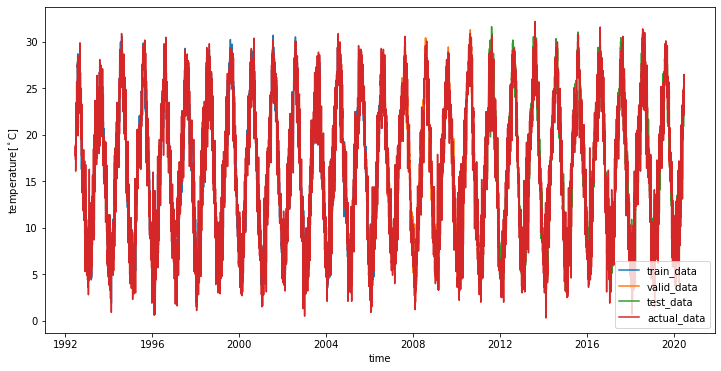

In [114]:
# グラフ化
train_predict_plot = np.empty_like(np.reshape(df_temperature.values[:, 0], (len(df_temperature), 1)))
train_predict_plot[:, :] = np.nan
idx_train_predict = look_back+len(train_predict)
train_predict_plot[look_back:idx_train_predict, :] = train_predict

valid_predict_plot = np.empty_like(np.reshape(df_temperature.values[:, 0], (len(df_temperature), 1)))
valid_predict_plot[:, :] = np.nan
idx_valid_predict = look_back+idx_train_predict + len(valid_predict)
valid_predict_plot[look_back+idx_train_predict:idx_valid_predict, :] = valid_predict

test_predict_plot = np.empty_like(np.reshape(df_temperature.values[:, 0], (len(df_temperature), 1)))
test_predict_plot[:, :] = np.nan
test_predict_plot[look_back+idx_valid_predict:, :] = test_predict
         
actual_plot = df_temperature.values[:, 0]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.plot(df_temperature.index, train_predict_plot, label='train_data')
ax.plot(df_temperature.index, valid_predict_plot, label='valid_data')
ax.plot(df_temperature.index, test_predict_plot, label='test_data')
ax.plot(df_temperature.index, actual_plot, label='actual_data')
ax.set_xlabel('time')
ax.set_ylabel('temperature[$^\circ$C]')

ax.legend(loc='lower right')
plt.show()
fig.savefig('img.png')
   

In [115]:
# 予測値と実際の値の差分
predict_data = np.full(shape=(len(df_temperature), 1), fill_value=-999)
predict_data[look_back:look_back+len(train_predict), :] = train_predict
predict_data[look_back*2+len(train_predict): look_back*2+len(train_predict)+len(valid_predict), :] = valid_predict
predict_data[look_back*3+len(train_predict)+len(valid_predict):, :] = test_predict

diff = df_temperature.values[:, 0] - predict_data[:, 0]
diff[diff>=900] = 0


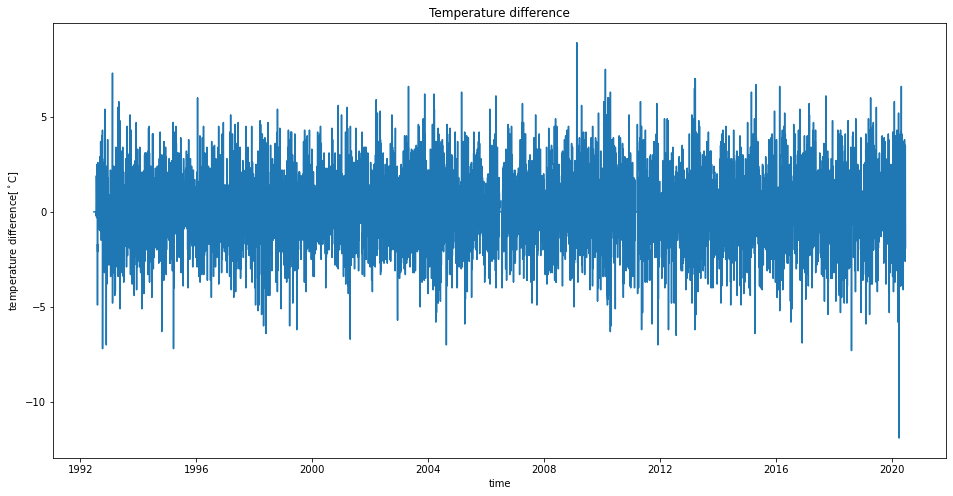

In [136]:
# プロット
fig, ax = plt.subplots(1, 1, figsize=(16,8))
ax.plot(df_temperature.index, diff)
ax.set_ylabel('temperature difference[$^\circ$C]')
ax.set_xlabel('time')
ax.set_title('Temperature difference')

plt.show()
fig.savefig('diff.png')


In [117]:
# 誤差平均、不偏標準偏差、誤差最大/最小
diff_mean = np.mean(diff)
diff_std = np.std(diff, ddof=1)
diff_max = np.max(abs(diff))
diff_min = np.min(abs(diff))
print(f"mean: {diff_mean}")
print(f"std: {diff_std}")
print(f"max: {diff_max}")
print(f"min: {diff_min}")

mean: 0.3211576065701995
std: 1.783378311577158
max: 11.9
min: 0.0


■予測結果からずれの大きい日を確認し、誤差要因を考察する

In [118]:
def create_large_diff(lim_num=7):
    acutual_large_diff = df_temperature.values[np.where(abs(diff)>=lim_num)]
    predict_large_diff = predict_data[np.where(abs(diff)>=lim_num)]
    large_diff_abs = abs(diff[np.where(abs(diff)>=lim_num)])
    day = df_temperature.index.values[np.where(abs(diff)>=lim_num)]
                                           
    df_large_diff = pd.DataFrame({'day': day,
                                  'acutual': acutual_large_diff[:, 0],
                                  'predict': predict_large_diff[:, 0],
                                  'diff_abs': large_diff_abs})

    df_large_diff = df_large_diff.sort_values('diff_abs', ascending=False).reset_index(drop=True)

    season = []
    month = []

    for i in range(len(df_large_diff)):
        tmp_month = df_large_diff.iloc[i, 0].month
        month.append(tmp_month)
        if tmp_month >= 3 and tmp_month <= 5:
            season.append("spring")
        elif tmp_month >= 6 and tmp_month <= 8:
            season.append("summer")
        elif tmp_month >= 9 and tmp_month <= 11:
            season.append('autumn')
        else:
            season.append('winter')
        
    df_large_diff['season'] = season
    df_large_diff['month'] = month
    
    return df_large_diff 

df_large_diff = create_large_diff()


In [119]:
df_large_diff

,day,acutual,predict,diff_abs,season,month
0,2020-03-29,4.1,16,11.9,spring,3
1,2009-02-14,17.9,9,8.9,winter,2
2,2010-02-09,15.5,8,7.5,winter,2
3,1993-02-07,16.3,9,7.3,winter,2
4,2018-08-07,22.7,30,7.3,summer,8
5,1995-03-18,6.8,14,7.2,spring,3
6,1992-10-05,13.8,21,7.2,autumn,10
7,1992-11-21,10.0,17,7.0,autumn,11
8,2004-08-15,21.0,28,7.0,summer,8
9,2011-12-01,8.0,15,7.0,winter,12


In [120]:
df_large_diff.groupby(['season', 'month']).count()

day  acutual  predict  diff_abs
season month                                 
autumn 10       1        1        1         1
       11       1        1        1         1
spring 3        4        4        4         4
summer 8        2        2        2         2
winter 2        3        3        3         3
       12       1        1        1         1

In [121]:
(len(df_large_diff[df_large_diff['month']==2]) + len(df_large_diff[df_large_diff['month']==3]))/len(df_large_diff)

0.5833333333333334

誤差が7度以上だった月のうち、2・3月が54%を占めている。

In [122]:
for s in ['spring', 'summer', 'autumn', 'winter']:
    print(f"{s}: {len(df_large_diff[df_large_diff['season']==s])}")


spring: 4
summer: 2
autumn: 2
winter: 4


In [123]:
(len(df_large_diff[df_large_diff['season']=="spring"]) + len(df_large_diff[df_large_diff['season']=="winter"]))/len(df_large_diff)

0.6666666666666666

誤差が7度以上だった季節のうち、春と冬が77%を占めている。

In [124]:
df_large_diff = create_large_diff(lim_num=5)
df_large_diff.groupby(['season', 'month']).count()

day  acutual  predict  diff_abs
season month                                 
autumn 9        6        6        6         6
       10       5        5        5         5
       11       8        8        8         8
spring 3       20       20       20        20
       4       22       22       22        22
       5        6        6        6         6
summer 6        3        3        3         3
       7        3        3        3         3
       8        2        2        2         2
winter 1        5        5        5         5
       2       17       17       17        17
       12       6        6        6         6

In [125]:
(len(df_large_diff[df_large_diff['month']==2]) +
 len(df_large_diff[df_large_diff['month']==3]) +
 len(df_large_diff[df_large_diff['month']==4]) +
 len(df_large_diff[df_large_diff['month']==5]))/len(df_large_diff)

0.6310679611650486

誤差が5度以上だった月のうち、2～5月までが70%を占めている。

In [126]:
for s in ['spring', 'summer', 'autumn', 'winter']:
    print(f"{s}: {len(df_large_diff[df_large_diff['season']==s])}")


spring: 48
summer: 8
autumn: 19
winter: 28


In [127]:
(len(df_large_diff[df_large_diff['season']=="spring"]))/len(df_large_diff)

0.46601941747572817

誤差が5度以上だった季節のうち、春が56%を占めている。

誤差の大きい日の前後の温度を確認する

In [128]:
def plot_day_front_back(df, day, save_fig_name, len=7):
    t = day-datetime.timedelta(days=len)
    actual_temperature_list = []
    days_list = []
    pred_temperature_list = []
    for i in range(len*2+1):
        actual_temperature_list.append(df.loc[t, df.columns[0]])
        days_list.append(t)
        idx = (t-df.index[0]).days
        
        if idx < 0 or idx >= df.shape[0]:
            continue
        if idx >= look_back and idx < idx_train_predict:
            pred_temperature_list.append(train_predict_plot[idx, 0])
        elif idx >= look_back+idx_train_predict and idx < idx_valid_predict:
            pred_temperature_list.append(valid_predict_plot[idx, 0])
        elif idx >= look_back+idx_valid_predict:
            pred_temperature_list.append(test_predict_plot[idx, 0])
        else:
            pred_temperature.append(0)

        t += datetime.timedelta(days=1)    

    fig, ax= plt.subplots(1, 1, figsize=(16,8))
    ax.plot(days_list, actual_temperature_list, label="actual", color="blue")
    ax.plot(days_list, pred_temperature_list, label="predict", color="orange")
    ax.set_ylabel('temperature[$^\circ$C]')
    ax.axvline(x=day, color="red") # 基準用
    ax.legend()
    ax.grid()
    ax.set_xlabel('time')
    plt.show()
    fig.savefig(save_fig_name)


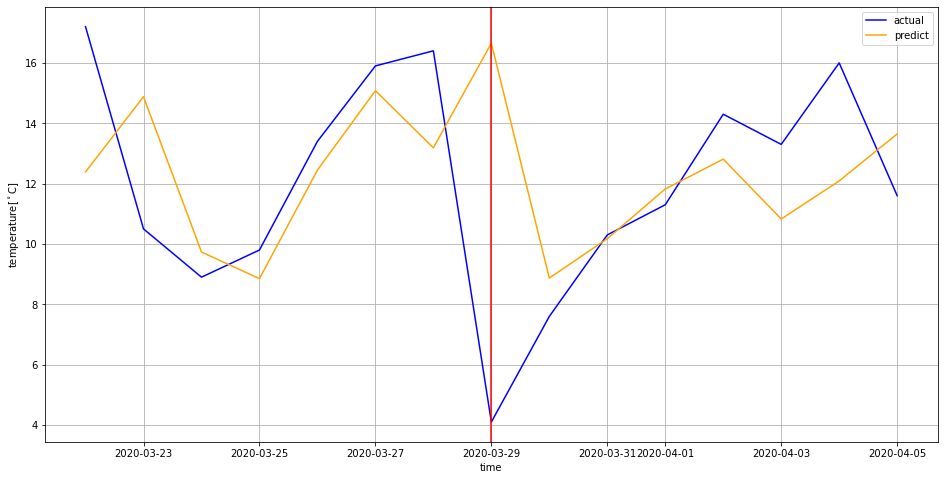

In [129]:
# 誤差1位
plot_day_front_back(df_temperature, df_large_diff.loc[0, 'day'], 'error1.png')


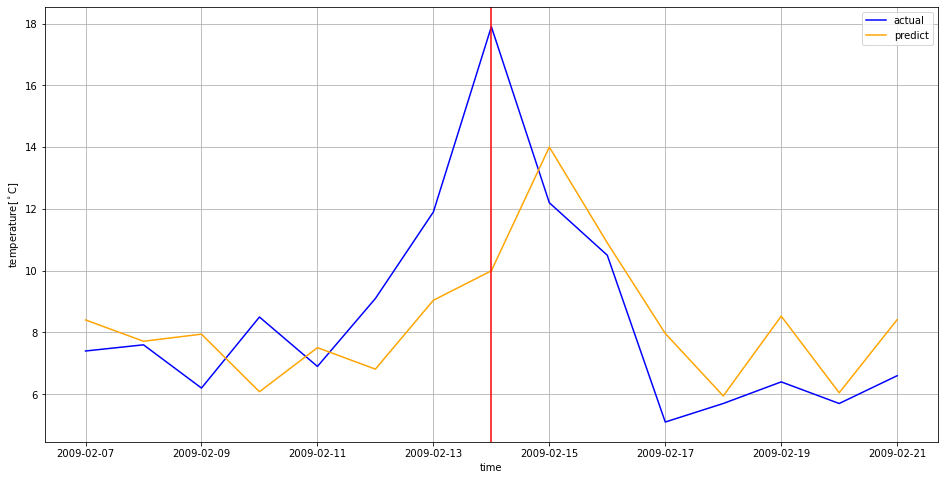

In [130]:
# 誤差2位
plot_day_front_back(df_temperature, df_large_diff.loc[1, 'day'], 'error2.png')

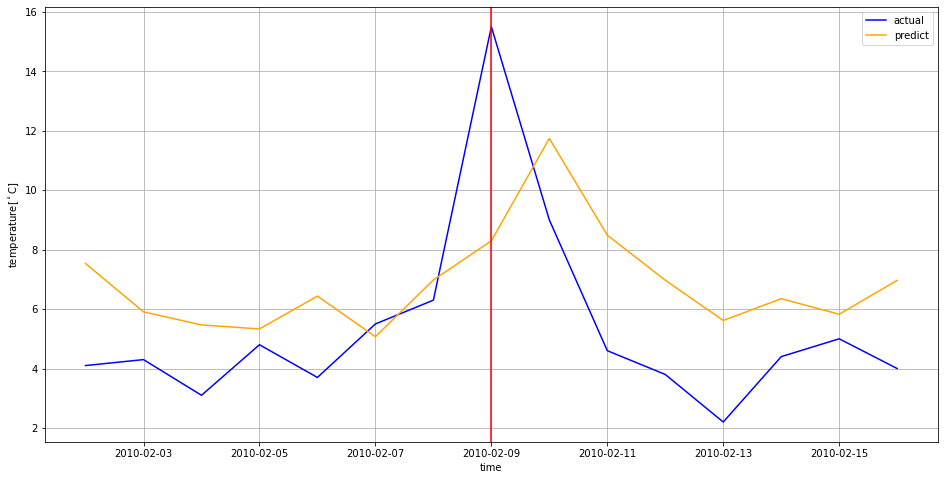

In [131]:
# 誤差3位
plot_day_front_back(df_temperature, df_large_diff.loc[2, 'day'], 'error3.png')

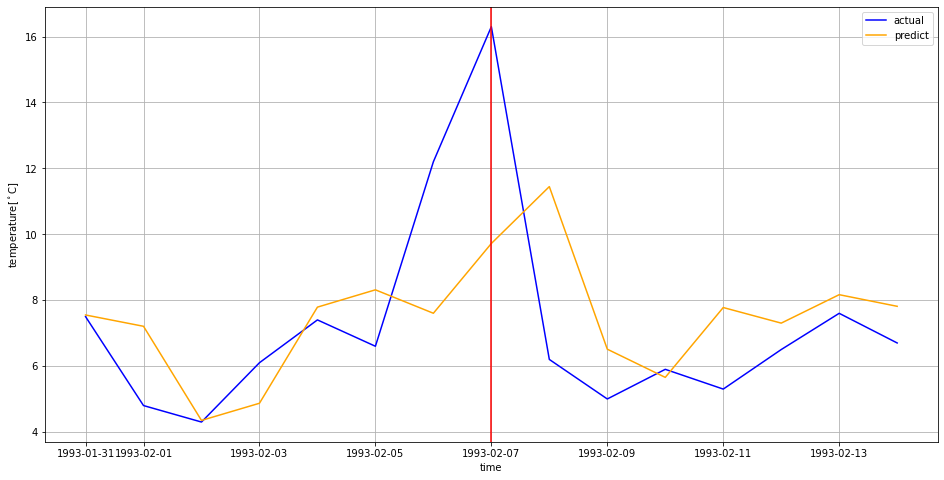

In [132]:
# 誤差4位
plot_day_front_back(df_temperature, df_large_diff.loc[3, 'day'], 'error4.png')

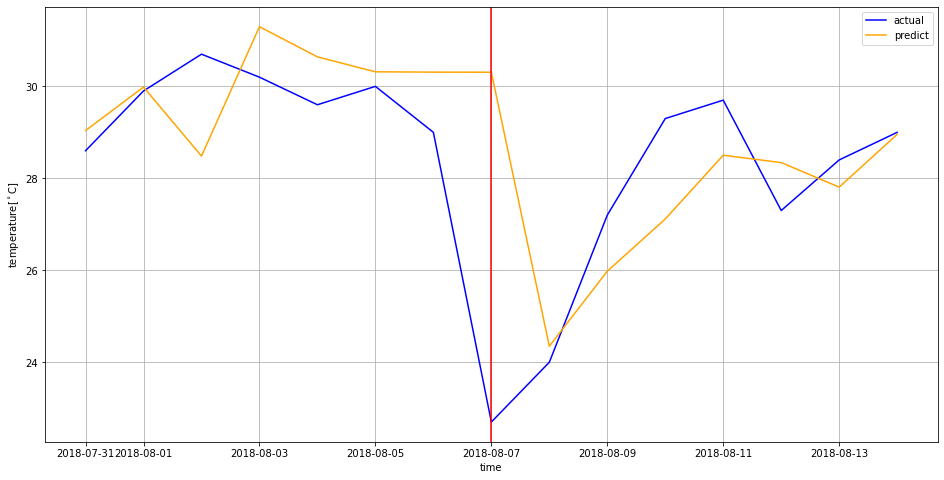

In [133]:
# 誤差5位
plot_day_front_back(df_temperature, df_large_diff.loc[4, 'day'], 'error5.png')

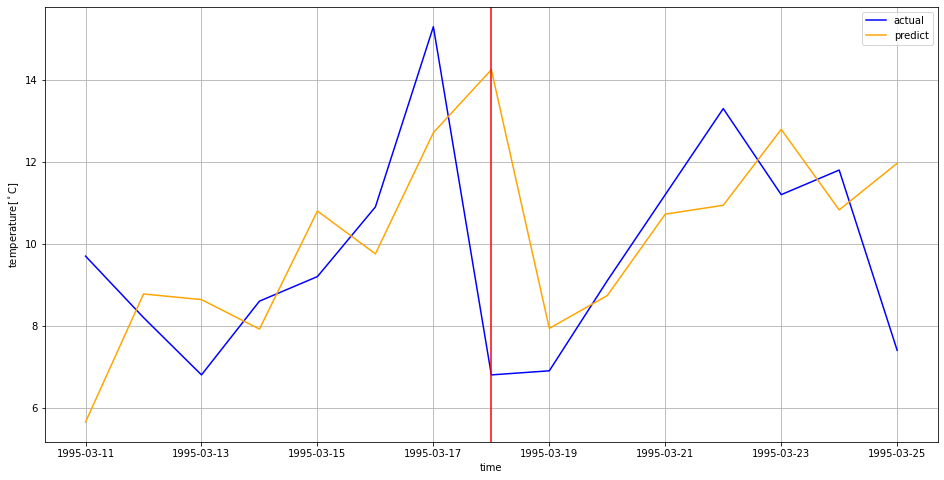

In [134]:
# 誤差6位
plot_day_front_back(df_temperature, df_large_diff.loc[5, 'day'], 'error6.png')

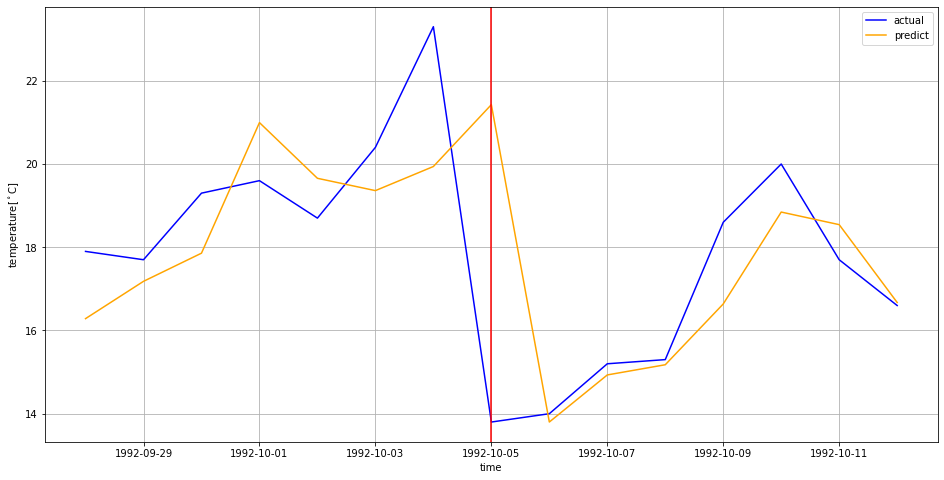

In [135]:
# 誤差7位
plot_day_front_back(df_temperature, df_large_diff.loc[6, 'day'], 'error7.png')

急激な温度変化に追随できていないことがわかる。<br>